<a href="https://colab.research.google.com/github/FieryCatalyst/ML-Models/blob/main/Uber'24_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# List files in the dataset directory
dataset_path = '/kaggle/input/uber-ride-analytics-dashboard'
print(os.listdir(dataset_path))

['ncr_ride_bookings.csv', 'Dasboard.gif', 'Uber.pbix']


In [ ]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# From the dataset page on Kaggle, the file is named "Uber Rideshare Data.csv"
file_path = "ncr_ride_bookings.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yashdevladdha/uber-ride-analytics-dashboard",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-328660195.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:          Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  

In [ ]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


**Reasoning**:
Analyze the column data types and content to suggest relevant visualization types.



In [ ]:
print("Column data types:")
print(df.dtypes)

print("\nUnique values in categorical columns (first 10):")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:10]}")

print("\nValue counts for some categorical columns:")
for col in ['Booking Status', 'Vehicle Type', 'Payment Method']:
    print(f"\n{col}:\n{df[col].value_counts().head()}")

# Suggest visualizations based on data types and content
print("\nSuggested Visualizations:")

# Temporal data
if 'Date' in df.columns and 'Time' in df.columns:
    print("- Time series plot of booking counts over time.")
    print("- Hourly/daily/monthly patterns in bookings.")

# Numerical data
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f"\nNumerical columns: {list(numerical_cols)}")
if 'Ride Distance' in numerical_cols:
    print("- Histogram of Ride Distance to see the distribution.")
    print("- Scatter plot of Ride Distance vs Booking Value to explore their relationship.")
if 'Booking Value' in numerical_cols:
     print("- Histogram of Booking Value to see the distribution.")
if 'Driver Ratings' in numerical_cols and 'Customer Rating' in numerical_cols:
    print("- Histograms of Driver Ratings and Customer Rating.")
    print("- Scatter plot of Driver Ratings vs Customer Rating.")


# Categorical data
categorical_cols = df.select_dtypes(include='object').columns
print(f"\nCategorical columns: {list(categorical_cols)}")
if 'Booking Status' in categorical_cols:
    print("- Bar plot of Booking Status counts.")
if 'Vehicle Type' in categorical_cols:
    print("- Bar plot of Vehicle Type counts.")
if 'Payment Method' in categorical_cols:
    print("- Bar plot of Payment Method counts.")
if 'Pickup Location' in categorical_cols and 'Drop Location' in categorical_cols:
    print("- Consider visualizations for frequent pickup/drop locations (requires data aggregation).")

# Combinations
if 'Booking Status' in categorical_cols and 'Vehicle Type' in categorical_cols:
    print("- Stacked bar plot of Booking Status by Vehicle Type.")
if 'Vehicle Type' in categorical_cols and 'Booking Value' in numerical_cols:
    print("- Box plot of Booking Value by Vehicle Type.")


Column data types:
Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

Unique values in cate

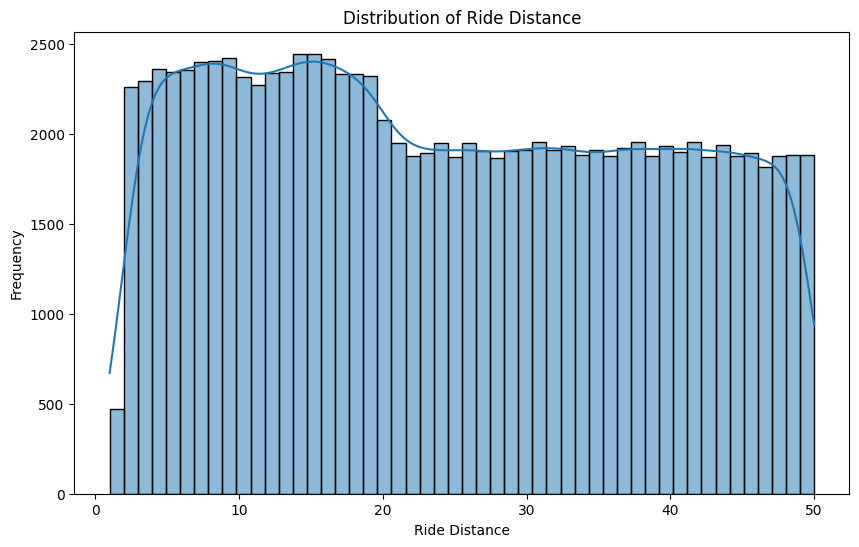

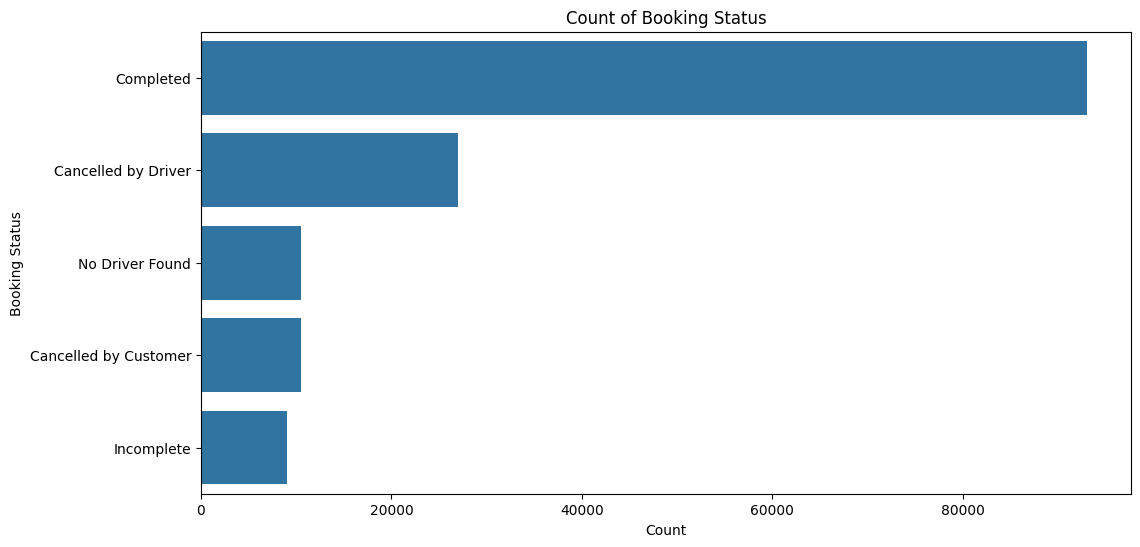

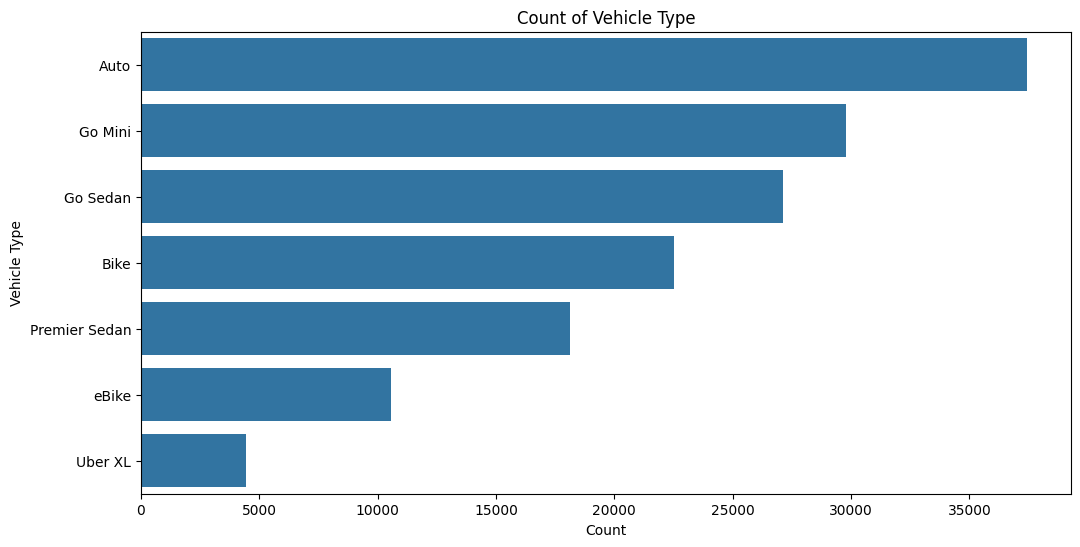

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a histogram for the 'Ride Distance' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Ride Distance'].dropna(), bins=50, kde=True)
plt.title('Distribution of Ride Distance')
plt.xlabel('Ride Distance')
plt.ylabel('Frequency')
plt.show()

# Generate a bar plot for the 'Booking Status' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df.dropna(subset=['Booking Status']), y='Booking Status', order=df['Booking Status'].value_counts().index)
plt.title('Count of Booking Status')
plt.xlabel('Count')
plt.ylabel('Booking Status')
plt.show()

# Generate a bar plot for the 'Vehicle Type' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df.dropna(subset=['Vehicle Type']), y='Vehicle Type', order=df['Vehicle Type'].value_counts().index)
plt.title('Count of Vehicle Type')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.show()

In [ ]:
# Analysis of existing plots:
# - Ride Distance histogram: Shows a skewed distribution with most rides being short. Further analysis could focus on the distribution of longer rides or segmenting by vehicle type.
# - Booking Status bar plot: Clearly shows the counts of different booking statuses. Further analysis could explore the reasons for cancelled or incomplete rides, or the relationship between booking status and other features like vehicle type or time of day.
# - Vehicle Type bar plot: Shows the popularity of different vehicle types. Further analysis could explore the performance metrics (like booking value or ride distance) for different vehicle types.

# Remaining suggested visualizations:
# - Time series plot of booking counts over time.
# - Hourly/daily/monthly patterns in bookings.
# - Scatter plot of Ride Distance vs Booking Value.
# - Histogram of Booking Value.
# - Histograms of Driver Ratings and Customer Rating.
# - Scatter plot of Driver Ratings vs Customer Rating.
# - Bar plot of Payment Method counts.
# - Visualizations for frequent pickup/drop locations (requires data aggregation).
# - Stacked bar plot of Booking Status by Vehicle Type.
# - Box plot of Booking Value by Vehicle Type.

# Suggested refinements or new visualizations:

# 1. Time series plot of booking counts:
#    - Why valuable: This would reveal temporal patterns in bookings (e.g., peak hours, days, or months), which is crucial for operational planning and understanding demand.

# 2. Scatter plot of Ride Distance vs Booking Value:
#    - Why valuable: This plot would show the relationship between the distance of a ride and its value, helping to understand the pricing structure and identify potential outliers or different pricing models for different ride distances.

# 3. Box plot of Booking Value by Vehicle Type:
#    - Why valuable: This would allow comparison of the distribution of booking values across different vehicle types, highlighting which vehicle types generate higher or more variable revenue.

# 4. Histograms of Driver Ratings and Customer Rating:
#    - Why valuable: Understanding the distribution of ratings is important for assessing service quality from both driver and customer perspectives.

print("Suggested Refinements and New Visualizations:")
print("1. Time series plot of booking counts over time to identify temporal patterns.")
print("2. Scatter plot of Ride Distance vs Booking Value to explore the relationship between distance and revenue.")
print("3. Box plot of Booking Value by Vehicle Type to compare revenue generation across different vehicle types.")
print("4. Histograms of Driver Ratings and Customer Rating to understand the distribution of service quality ratings.")

Suggested Refinements and New Visualizations:
1. Time series plot of booking counts over time to identify temporal patterns.
2. Scatter plot of Ride Distance vs Booking Value to explore the relationship between distance and revenue.
3. Box plot of Booking Value by Vehicle Type to compare revenue generation across different vehicle types.
4. Histograms of Driver Ratings and Customer Rating to understand the distribution of service quality ratings.


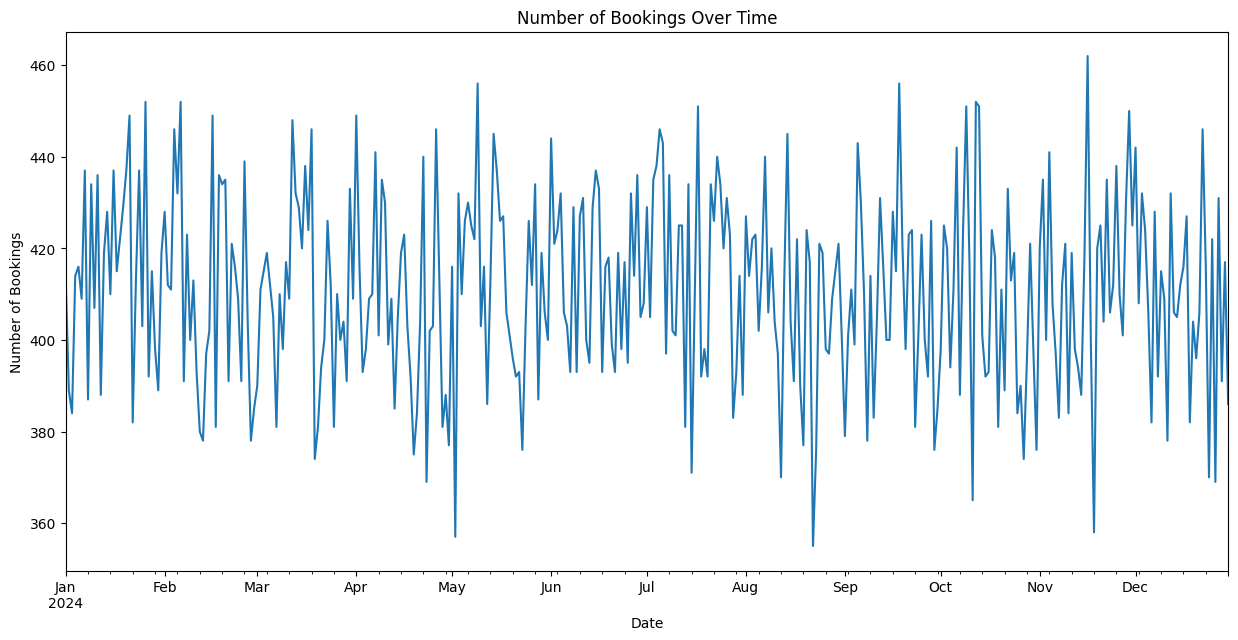

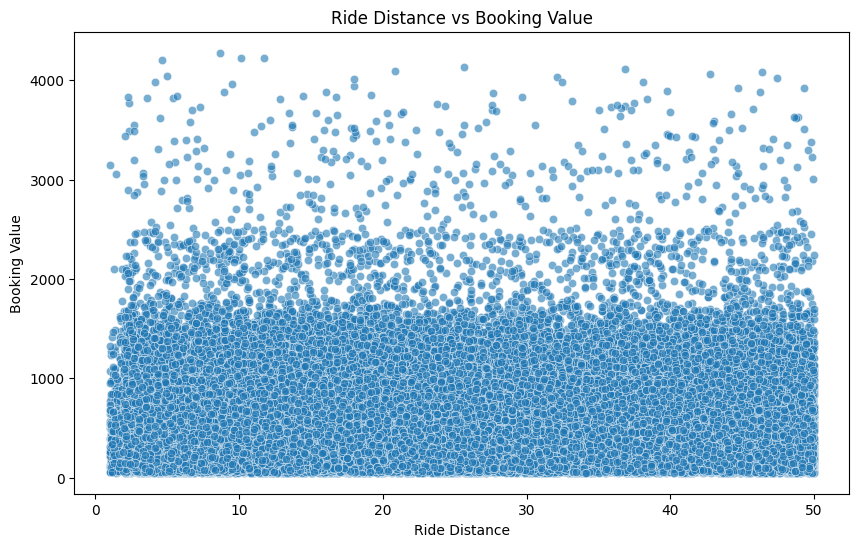

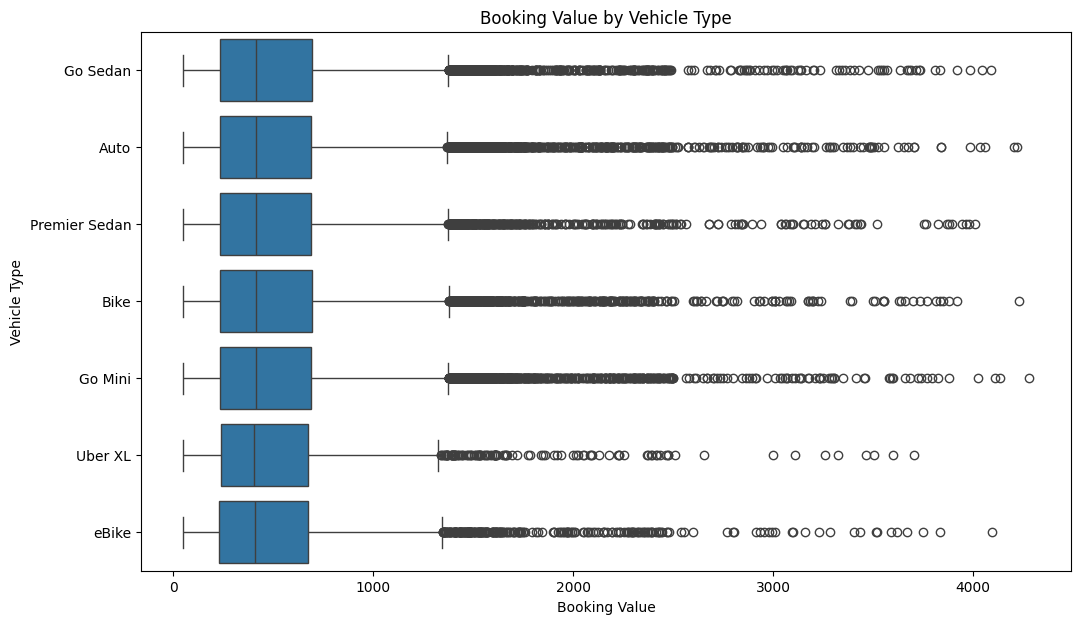

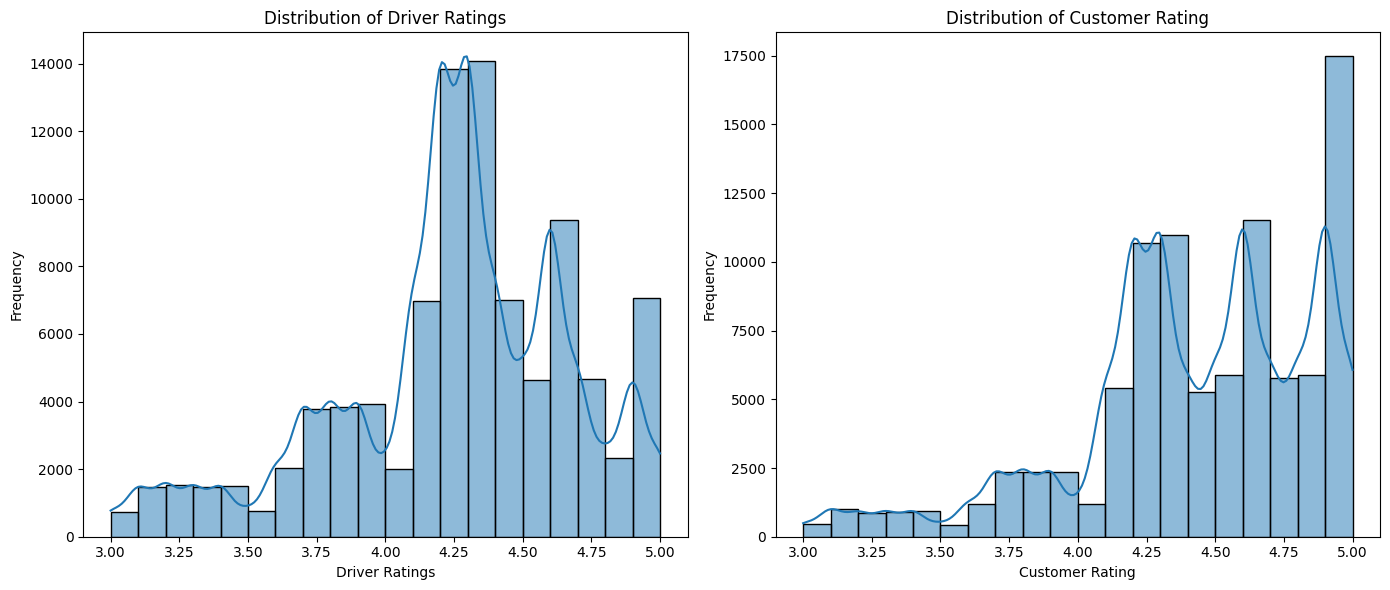

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Time series plot showing the number of bookings over time
df['Date'] = pd.to_datetime(df['Date'])
daily_bookings = df.groupby('Date').size()

plt.figure(figsize=(15, 7))
daily_bookings.plot()
plt.title('Number of Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()

# 3. Scatter plot of 'Ride Distance' vs 'Booking Value'
# Handle missing values by dropping rows with NaN in these columns
plot_data_scatter = df.dropna(subset=['Ride Distance', 'Booking Value'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data_scatter, x='Ride Distance', y='Booking Value', alpha=0.6)
plt.title('Ride Distance vs Booking Value')
plt.xlabel('Ride Distance')
plt.ylabel('Booking Value')
plt.show()

# 4. Box plot of 'Booking Value' by 'Vehicle Type'
# Handle missing values by dropping rows with NaN in these columns
plot_data_box = df.dropna(subset=['Booking Value', 'Vehicle Type'])

plt.figure(figsize=(12, 7))
sns.boxplot(data=plot_data_box, x='Booking Value', y='Vehicle Type')
plt.title('Booking Value by Vehicle Type')
plt.xlabel('Booking Value')
plt.ylabel('Vehicle Type')
plt.show()

# 5. Histograms for 'Driver Ratings' and 'Customer Rating'
# Handle missing values by dropping NaN
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Driver Ratings'].dropna(), bins=20, kde=True)
plt.title('Distribution of Driver Ratings')
plt.xlabel('Driver Ratings')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Customer Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



*   The dataset contains 21 columns with a mix of data types, including object (categorical or string) and float64 (numerical).
*   Several columns, such as 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', and 'Payment Method', have a significant number of missing values.
*   The initial visualizations successfully showed the distribution of 'Ride Distance', the counts of different 'Booking Status' categories, and the frequency of various 'Vehicle Type' usages.
*   Further visualizations revealed the temporal trend of bookings, the relationship between 'Ride Distance' and 'Booking Value', the distribution of 'Booking Value' across different 'Vehicle Types', and the distributions of 'Driver Ratings' and 'Customer Rating'.


